В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [206]:
import pandas as pd
medical_df = pd.read_csv('medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']

#1.1 Методу МНК

In [207]:
#1.1
import numpy as np
import matplotlib.pyplot as plt

X = non_smoker_df.age.to_numpy()
y=non_smoker_df.charges.to_numpy()

def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
MNK_coefs = normal_equations(X_with_intercept, y)
np.dot(X_with_intercept[0], MNK_coefs)
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

##1.1.1  коефіцієнти моделі

In [208]:
MNK_coefs

array([-2091.42055657,   267.24891283])

##1.1.2 обчисліть прогнози моделі

In [209]:
y_pred_MNK=MNK_coefs[1]*X+MNK_coefs[0]

##1.1.3 точність прогнозу RMSE

In [210]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_MNK = r2_score(y, predictions_MNK)
rmse_MNK = mean_squared_error(y, predictions_MNK)**0.5
mae_MNK = mean_absolute_error(y, predictions_MNK)

print(f"R² score: {r2_MNK:.2f}")
print(f"Root Mean Squared Error: {rmse_MNK:.2f}")
print(f"Mean Absolute Error: {mae_MNK:.2f}")

R² score: 0.39
Root Mean Squared Error: 4662.51
Mean Absolute Error: 2580.52


##1.1.4 Plot

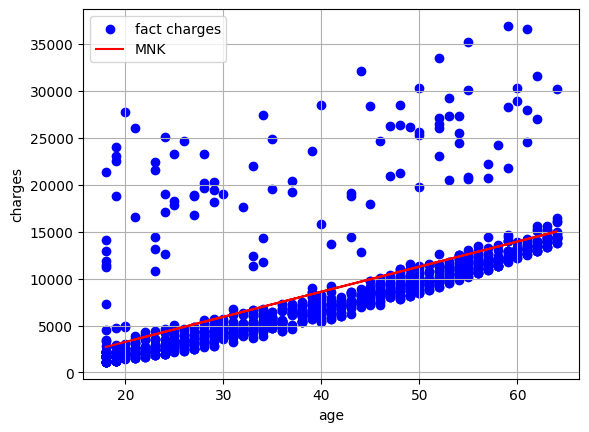

In [211]:
plt.scatter(X, y, color='blue', label='fact charges')
plt.plot(X, predictions_MNK, color='red', label='MNK')
#plt.plot(X, y_pred_MNK, color='green', label='MNK')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.grid(True)
plt.show()

#1.2 Градієнтний спуск

In [144]:
#1.2 Градієнтний спуск

X = non_smoker_df.age.to_numpy()
y = non_smoker_df.charges.to_numpy()

mu=X.mean()
sigma=X.std()
X_scaled= (X-mu)/sigma

def full_batch_gradient_descent(X, y, lr=0.1, epochs=1000):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X)
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(X_scaled, y, lr=0.1, epochs=100)
predictions_fbgd = m * X_scaled + b




In [145]:
m_scaled = m
b_scaled = b

m_orig = m_scaled / sigma
b_orig = b_scaled - (m_scaled * mu / sigma)



##1.2.1  коефіцієнти моделі

In [146]:
m_orig, b_orig

(np.float64(267.2489127767601), np.float64(-2091.420556139057))

##1.2.2 обчисліть прогнози моделі

In [147]:
y_pred_fbgd = m_orig * X + b_orig

##1.2.3 точність прогнозу RMSE

In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_fbgd = r2_score(y, y_pred_fbgd)
rmse_fbgd = mean_squared_error(y, y_pred_fbgd)**0.5
mae_fbgd = mean_absolute_error(y, y_pred_fbgd)

print(f"R² score: {r2_fbgd:.2f}")
print(f"R² score: {r2_MNK:.2f}")
print(f"Root Mean Squared Error: {rmse_fbgd:.2f}")
print(f"Root Mean Squared Error: {rmse_MNK:.2f}")
print(f"Mean Absolute Error: {mae_fbgd:.2f}")
print(f"Mean Absolute Error: {mae_MNK:.2f}")

R² score: 0.39
R² score: 0.39
Root Mean Squared Error: 4662.51
Root Mean Squared Error: 4662.51
Mean Absolute Error: 2580.52
Mean Absolute Error: 2580.52


##1.2.4 Plot

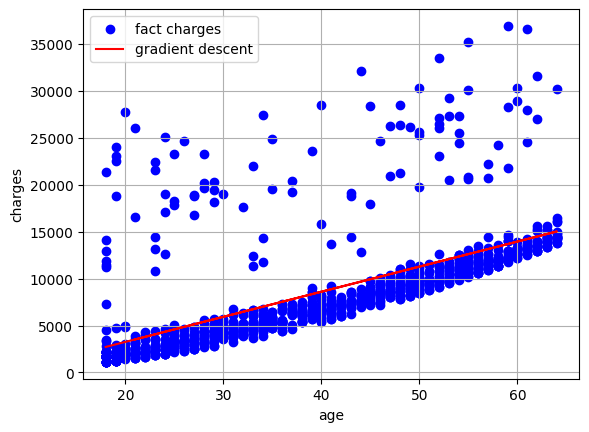

In [150]:
plt.scatter(X, y, color='blue', label='fact charges')
plt.plot(X, y_pred_fbgd, color='red', label='gradient descent')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.grid(True)
plt.show()

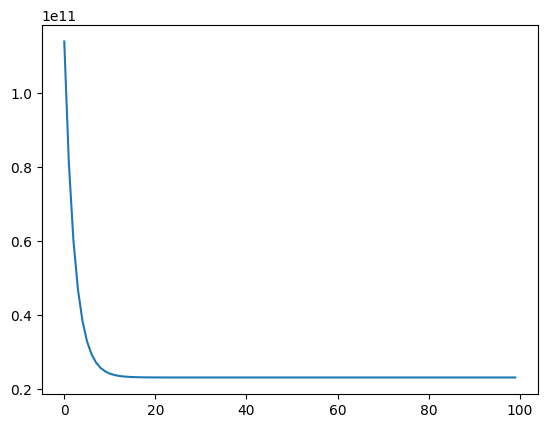

In [151]:
plt.plot(errors)

#1.3 LinearRegression

In [214]:
#1.3
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

X = non_smoker_df['age'].to_numpy().reshape(-1, 1)
y = non_smoker_df['charges'].to_numpy()

lin_reg.fit(X, y)

LinearRegression()

##1.3.1  коефіцієнти моделі

In [215]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), np.float64(-2091.4205565650864))

##1.3.2 обчисліть прогнози моделі

In [216]:
y_pred_lg=lin_reg.coef_*X+lin_reg.intercept_

##1.3.3 точність прогнозу RMSE

In [224]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_lg = r2_score(y, y_pred_lg)
rmse_lg = mean_squared_error(y, y_pred_lg)**0.5
mae_lg = mean_absolute_error(y, y_pred_lg)

print(f"R² score LinReg: {r2_lg:.5f}")
print(f"R² score MNK: {r2_MNK:.5f}")
print(f"R² score GS: {r2_fbgd:.5f}")
print(f"Root Mean Squared Error LinReg: {rmse_lg:.2f}")
print(f"Root Mean Squared Error MNK: {rmse_MNK:.2f}")
print(f"Root Mean Squared Error GS: {rmse_fbgd:.2f}")
print(f"Mean Absolute Error LinReg: {mae_lg:.2f}")
print(f"Mean Absolute Error MNK: {mae_MNK:.2f}")
print(f"Mean Absolute Error GS: {mae_fbgd:.2f}")

R² score LinReg: 0.39432
R² score MNK: 0.39432
R² score GS: 0.39432
Root Mean Squared Error LinReg: 4662.51
Root Mean Squared Error MNK: 4662.51
Root Mean Squared Error GS: 4662.51
Mean Absolute Error LinReg: 2580.52
Mean Absolute Error MNK: 2580.52
Mean Absolute Error GS: 2580.52


##1.3.4 Plot

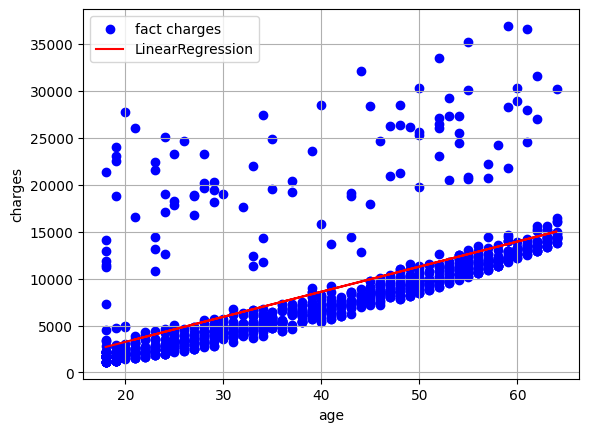

In [218]:
plt.scatter(X, y, color='blue', label='fact charges')
plt.plot(X, y_pred_lg, color='red', label='LinearRegression')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.grid(True)
plt.show()

#1 Final PLOT

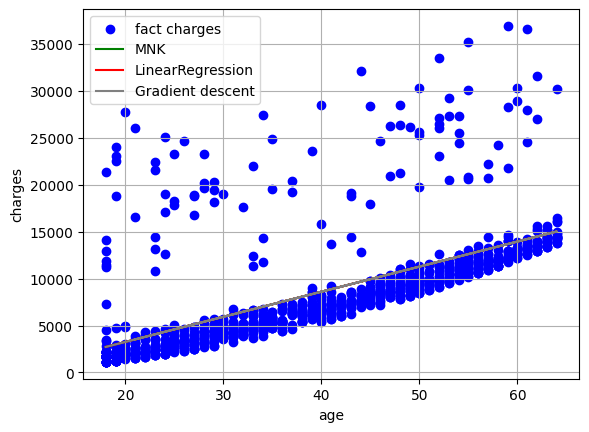

In [219]:
plt.scatter(X, y, color='blue', label='fact charges')
plt.plot(X, y_pred_MNK, color='green', label='MNK')
plt.plot(X, y_pred_lg, color='red', label='LinearRegression')
plt.plot(X, y_pred_fbgd, color='gray', label='Gradient descent')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.grid(True)
plt.show()

In [225]:
r2_MNK==r2_fbgd,r2_MNK==r2_lg, r2_fbgd==r2_lg,

(True, True, True)

In [226]:
rmse_MNK==rmse_fbgd,rmse_MNK==rmse_lg, rmse_fbgd==rmse_lg,

(True, True, True)

In [227]:
mae_MNK==mae_fbgd, mae_MNK==mae_lg, mae_fbgd==mae_lg,

(False, False, False)

In [228]:
print('Коефіцієнти з МНК: ', MNK_coefs)
print('Коефіцієнти з стохаст. град. спуску: ', b_orig, m_orig)
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_)

Коефіцієнти з МНК:  [-2091.42055657   267.24891283]
Коефіцієнти з стохаст. град. спуску:  -2091.420556139057 267.2489127767601
Коефіцієнти з sklearn:  -2091.4205565650864 [267.24891283]


#1. Висновок
Параметри моделі абсолютно ідентичні.
Мої значення були 275, -3000, що близькі до 267, -2091

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

#2

In [229]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [200]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [230]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

X = smoker_df['age'].to_numpy().reshape(-1, 1)
y = smoker_df['charges'].to_numpy()

lin_reg.fit(X, y)

LinearRegression()

In [231]:
lin_reg.coef_, lin_reg.intercept_

(array([305.23760211]), np.float64(20294.128126915966))

In [232]:
predictions_sklearn = lin_reg.predict(X)

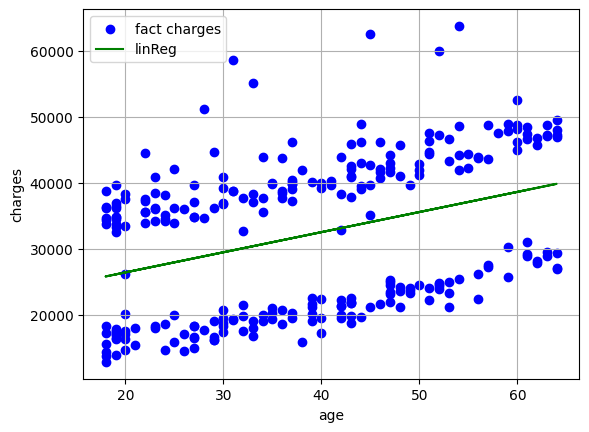

In [233]:
plt.scatter(X, y, color='blue', label='fact charges')
plt.plot(X, predictions_sklearn, color='green', label='linReg')

plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.grid(True)
plt.show()

In [234]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_lg_2 = r2_score(y, predictions_sklearn)
rmse_lg_2 = mean_squared_error(y, predictions_sklearn)**0.5
mae_lg_2 = mean_absolute_error(y, predictions_sklearn)

print(f"R² score: {r2_lg_2:.2f}")
print(f"Root Mean Squared Error: {rmse_lg_2:.2f}")
print(f"Mean Absolute Error: {mae_lg_2:.2f}")


R² score: 0.14
Root Mean Squared Error: 10711.00
Mean Absolute Error: 10097.80


#Висновок 2
Точність моделі дуже низька.